# **1. Import Library**

In [ ]:
import kagglehub #fetch dataset
import pandas as pd #data handling
import matplotlib.pyplot as plt #visualize
from yellowbrick.cluster import KElbowVisualizer #elbow method
import numpy as np #array handling
import os


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import preprocessing
from sklearn.decomposition import PCA #nouse
from sklearn.manifold import TSNE #nouse

# **2. Load Dataset**

In [ ]:
# Download latest version
path = kagglehub.dataset_download("mohitkumar282/used-car-dataset") + "/used_car_dataset.csv"
df = pd.read_csv(path)

#**3. Exploratory Data Analysis (EDA)**

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). \

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [ ]:
#meninjau jumlah baris dan kolom serta jenis data di setiap kolom dalam dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [ ]:
#untuk mengetahui statistik deskriptif dari column numerikal
df.describe()

,Year,Age
count,9582.000000,9582.000000
mean,2016.361094,7.638906
std,4.087226,4.087226
min,1986.000000,0.000000
25%,2014.000000,5.000000
50%,2017.000000,7.000000
75%,2019.000000,10.000000
max,2024.000000,38.000000


In [ ]:
df.isnull().sum()

,0
Brand,0
model,0
Year,0
Age,0
kmDriven,47
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


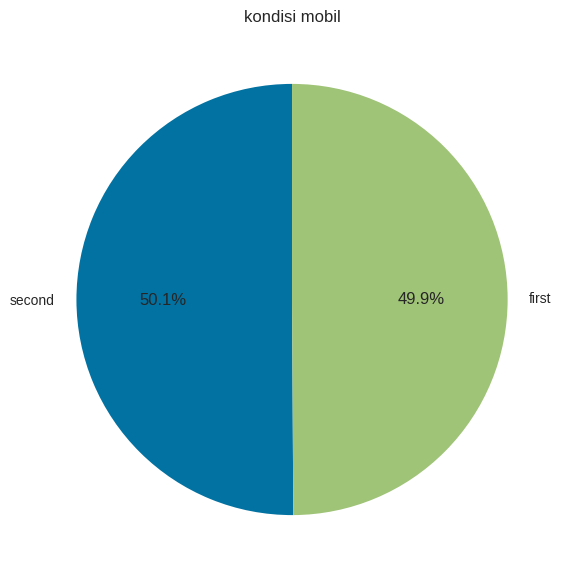

In [ ]:
#Pemakaian
plt.figure(figsize=(7, 7))
plt.pie(df['Owner'].value_counts(), labels=['second','first'], autopct='%1.1f%%', startangle=90)
plt.title('kondisi mobil')
plt.show()

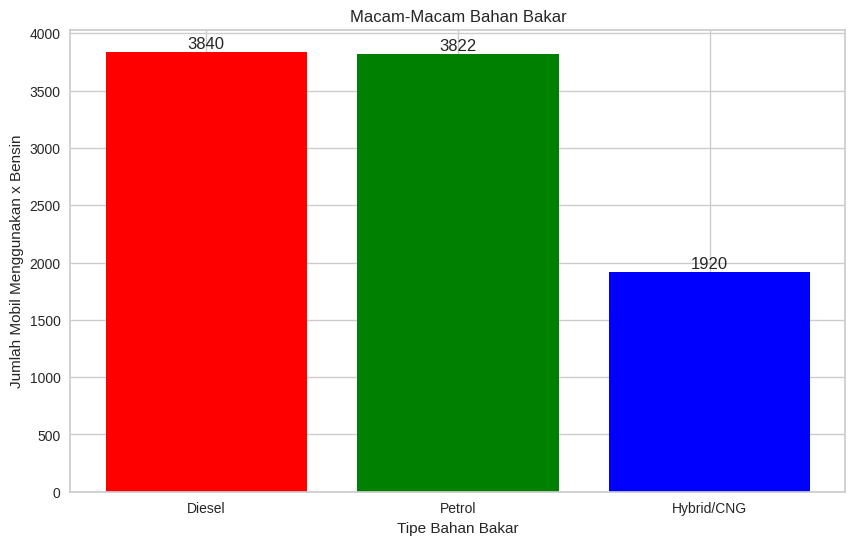

In [ ]:
#Jenis Bahan Bakar
df.FuelType.unique()
Diesel = df.FuelType[df.FuelType=="Diesel"].count()
Petrol = df.FuelType[df.FuelType=="Petrol"].count()
Hybrid_CNG = df.FuelType[df.FuelType=="Hybrid/CNG"].count()
x = ["Diesel", "Petrol", "Hybrid/CNG"]
y = [Diesel, Petrol, Hybrid_CNG]

plt.figure(figsize=(10, 6))
plt.bar(x, y, color=['red', 'green', 'blue'])
plt.xlabel("Tipe Bahan Bakar")
plt.ylabel("Jumlah Mobil Menggunakan x Bensin")
plt.title("Macam-Macam Bahan Bakar")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
plt.show()


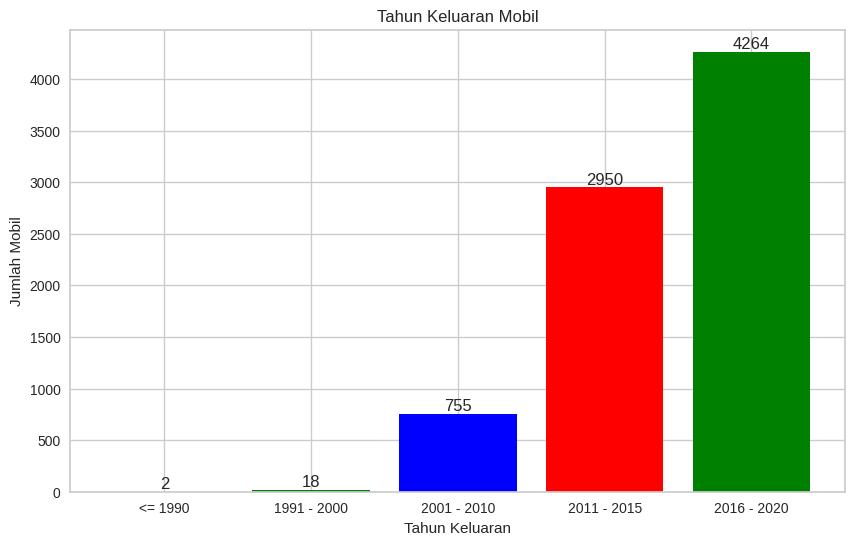

In [ ]:
#Tahun Keluar
df.Year.unique()
release1990 = df.Year[(df.Year <= 1990)].count()
release1990_2000 = df.Year[(df.Year <= 2000) & (df.Year >= 1991)].count()
release2000_2010 = df.Year[(df.Year <= 2010) & (df.Year >= 2001)].count()
release2010_2015 = df.Year[(df.Year <= 2015) & (df.Year >= 2011)].count()
release2015_2020 = df.Year[(df.Year <= 2020) & (df.Year >= 2016)].count()
x = ["<= 1990","1991 - 2000","2001 - 2010","2011 - 2015","2016 - 2020"]
y = [release1990,release1990_2000,release2000_2010,release2010_2015,release2015_2020]
plt.figure(figsize=(10, 6))
plt.bar(x,y,color=['red','green','blue'])
plt.xlabel("Tahun Keluaran")
plt.ylabel("Jumlah Mobil")
plt.title("Tahun Keluaran Mobil")

for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')

plt.show()

tipe data tidak sesuai


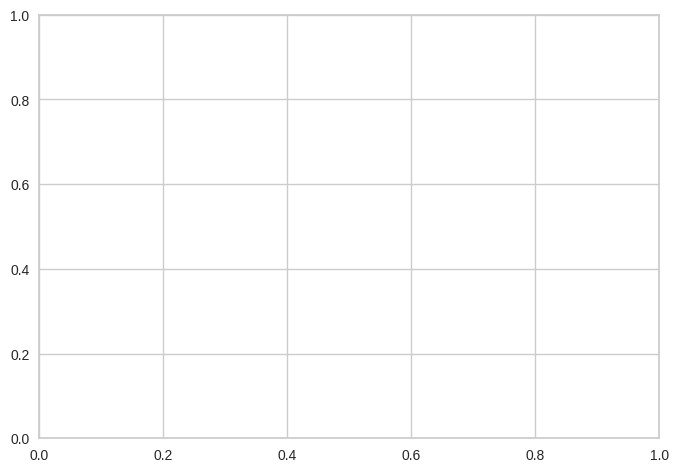

In [ ]:
#kmDriven & price
try:
  plt.hist(df.kmDriven,bins=500,edgecolor="black")
  plt.hist(df.AskPrice,bins=500,edgecolor="black")
  plt.show()
except TypeError:
  print("tipe data tidak sesuai")

#data in kmDriven column should be a numerical value but categorical value is given

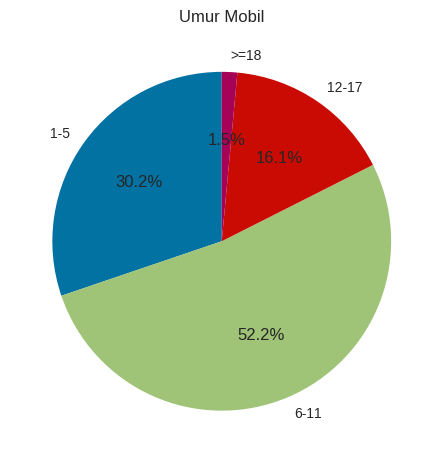

In [ ]:
#Age
rangeUmur = ['1-5','6-11','12-17','>=18']
umur1_5 = df.Age[(df.Age >= 1) & (df.Age <= 5)].count()
umur6_11 = df.Age[(df.Age >= 6) & (df.Age <= 11)].count()
umur12_17 = df.Age[(df.Age >=12) & (df.Age <= 17)].count()
umur18keatas = df.Age[(df.Age >= 18)].count()
perGroup = [umur1_5,umur6_11,umur12_17,umur18keatas]
plt.pie(perGroup,labels=rangeUmur,autopct='%1.1f%%',startangle=90)
plt.title('Umur Mobil')
plt.show()

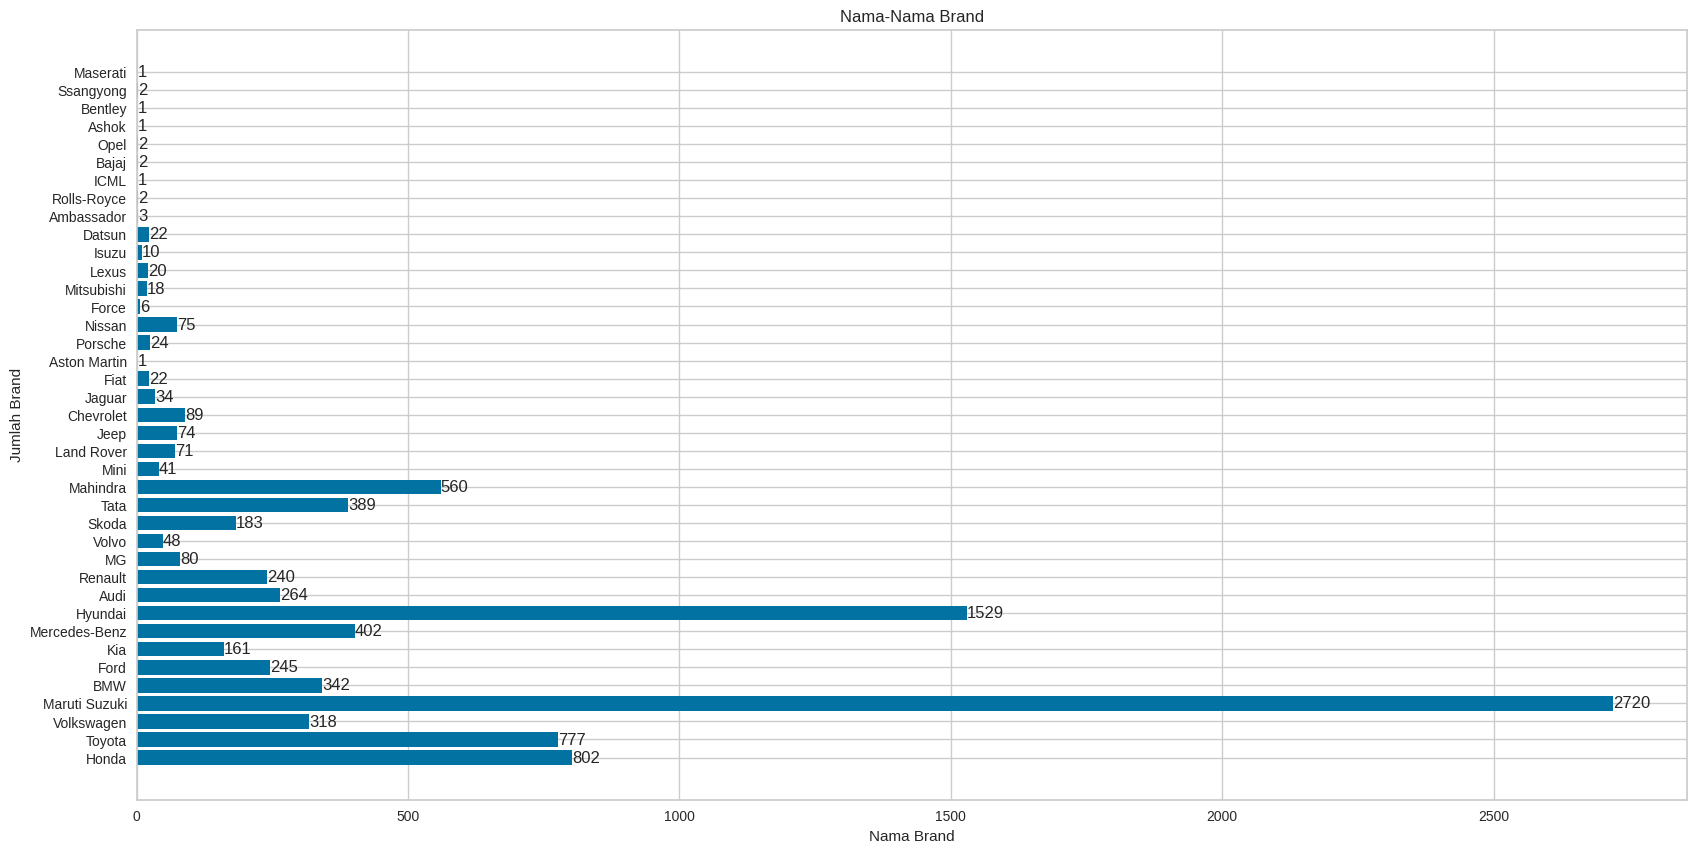

In [ ]:
#brand
plt.figure(figsize=(20, 10))
xBrandName = df.Brand.unique()
yBrandCount = [df.Brand[df.Brand==i].count() for i in df.Brand.unique()]
plt.barh(xBrandName,yBrandCount)
plt.xlabel("Nama Brand")
plt.ylabel("Jumlah Brand")
plt.title("Nama-Nama Brand")

for i in range(len(xBrandName)):
  plt.text(yBrandCount[i], i, yBrandCount[i], ha='left', va='center')

plt.show()


<ipython-input-12-8b6d9ebdc1bc>:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


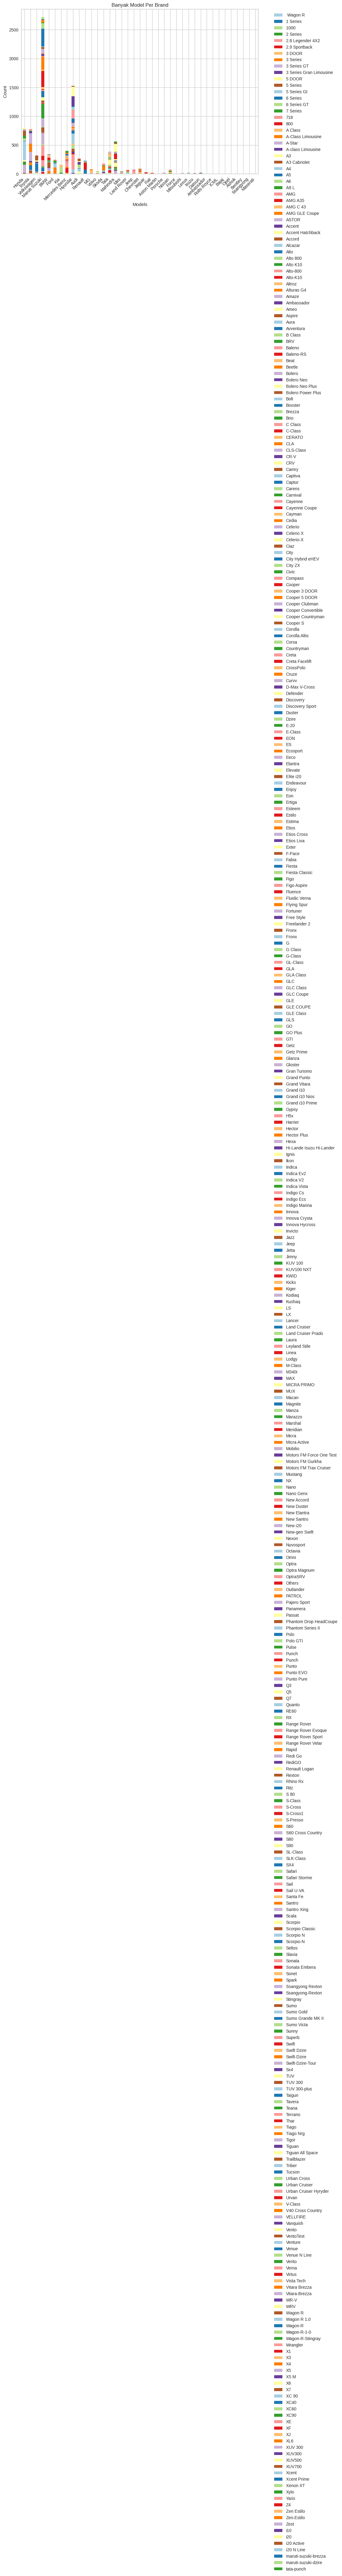

In [ ]:
#model
xTotalBrands = df.Brand.unique()

allModels = []
for brand in xTotalBrands:
    modelsInBrand = df[df.Brand == brand].model.unique()
    allModels.extend(modelsInBrand)
allModels = sorted(list(set(allModels)))

brandModelCounts = {}
for brand in xTotalBrands:
    brandModelCounts[brand] = {model: 0 for model in allModels}
    modelsInBrand = df[df.Brand == brand].model
    for model in modelsInBrand:
        brandModelCounts[brand][model] += 1

counterMatrix = pd.DataFrame(brandModelCounts).T

fig, ax = plt.subplots(figsize=(10, 7))

counterMatrix.plot(kind='bar', stacked=True, ax=ax, color=plt.cm.Paired.colors, legend=True)

ax.set_xlabel('Models')
ax.set_ylabel('Count')
ax.set_title('Banyak Model Per Brand')
ax.set_xticklabels(xTotalBrands, rotation=45, ha='right')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

# **4. Data Preprocessing**

In [ ]:
#mengubah kolom kmDriven menjadi format yang sesuai
if df.kmDriven.dtypes == object:
  df.kmDriven = df.kmDriven.replace({',':'','km':''},regex=True).str.strip().astype(float)

In [ ]:
#mengubah kolom AskPrice menjadi format yang sesuai
if df.AskPrice.dtypes == object:
  df.AskPrice = df.AskPrice.replace({',':'','₹':''},regex=True).str.strip().astype(float)

In [ ]:
#menghilangkan duplikat dalam dataset
duplicates = df[df.duplicated()]
if len(duplicates) > 0:
  df = df.drop_duplicates()

df[df.duplicated()] # cek jika data duplikat sudah dihapus

,Brand,model,Year,Age,kmDriven,Transmission,Owner,FuelType,PostedDate,AdditionInfo,AskPrice


In [ ]:
# mengisi nilai kosong pada kolom kmDriven dengan nilai mean
if df.isnull().sum().sum() > 0:
  df.kmDriven = df.kmDriven.fillna(df.kmDriven.mean()) # mengganti data yang kosong dengan nilai mean
df.isnull().sum() # mengecek jika sudah terisi

<ipython-input-16-29f00b4936b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.kmDriven = df.kmDriven.fillna(df.kmDriven.mean()) # mengganti data yang kosong dengan nilai mean


,0
Brand,0
model,0
Year,0
Age,0
kmDriven,0
Transmission,0
Owner,0
FuelType,0
PostedDate,0
AdditionInfo,0


In [ ]:
#Menerapkan label encoding pada column Owner
label_encoder = preprocessing.LabelEncoder()
df.Owner = label_encoder.fit_transform(df.Owner)
df.Owner

<ipython-input-17-6c1843ed2e90>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Owner = label_encoder.fit_transform(df.Owner)


,Owner
0,1
1,1
2,0
3,1
4,0
...,...
9577,1
9578,0
9579,0
9580,0


In [ ]:
#one hot encoding pada kolom Brand
encBrand = preprocessing.OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encodedDataBrand = encBrand.fit_transform(df[['Brand']])
encodedDfBrand = pd.DataFrame(encodedDataBrand, columns=encBrand.get_feature_names_out(['Brand']))
df = df.drop('Brand', axis=1)
df = pd.concat([df, encodedDfBrand], axis=1)

In [ ]:
#one hot encoding pada kolom FuelType
encFuelT = preprocessing.OneHotEncoder(sparse_output=False,handle_unknown='ignore')
encodedDataFuelT = encFuelT.fit_transform(df[['FuelType']])
encodedDfFuelT = pd.DataFrame(encodedDataFuelT, columns=encFuelT.get_feature_names_out(['FuelType']))
encodedDfFuelT = encodedDfFuelT.drop('FuelType_nan', axis=1)
df = df.drop('FuelType', axis=1)
df = pd.concat([df, encodedDfFuelT], axis=1)

In [ ]:
# menghapus barisan yang kosong karena proses encoding
if df.isnull().sum().sum() > 0:
  df = df.dropna() #menhapus data yang koson
df.isnull().sum() # mengecek jika tidak ada data yang kosong

,0
model,0
Year,0
Age,0
kmDriven,0
Transmission,0
Owner,0
PostedDate,0
AdditionInfo,0
AskPrice,0
Brand_Ambassador,0


In [ ]:
# Mengambil fitur fitur yang penting
brandFuelFeatureColumns = encodedDfBrand.columns.tolist() + encodedDfFuelT.columns.tolist()

X = df.iloc[:, [2, 3,5,8]].values

# Menampilkan data yang diambil dalam format DataFrame dengan nama kolom yang sesuai
X = pd.DataFrame(X, columns=['Age','kmDriven','Owner','AskPrice'])

In [ ]:
#standarisasi data
stdData = preprocessing.StandardScaler().fit_transform(X)
X = pd.DataFrame(stdData,columns=['Age', 'kmDriven','Owner','AskPrice'])
X

,Age,kmDriven,Owner,AskPrice
0,3.725200,0.476625,1.037439,-0.517514
1,1.786556,2.113996,1.037439,-0.407239
2,1.544225,0.107256,-0.963912,-0.523641
3,-0.152089,0.218561,1.037439,-0.290838
4,-0.636750,-0.466643,-0.963912,-0.217321
...,...,...,...,...
8188,-0.152089,0.488300,1.037439,-0.419492
8189,-1.606072,-1.000569,-0.963912,0.435139
8190,-1.848403,-1.144515,-0.963912,4.264131
8191,0.090242,-0.161861,1.037439,-0.440934


In [ ]:
# Pilih data hasil label encoding dan hasil ekstraksi fitur
label_encoded = X.iloc[:, [0, 1, 2, 3]].values
feature_extracted = df.iloc[:, list(range(9, 51))].values

# Gabungkan data
parsed = np.hstack((label_encoded, feature_extracted))
X = pd.DataFrame(parsed, columns=['Age','kmDriven','Owner','AskPrice'] + brandFuelFeatureColumns)
X

,Age,kmDriven,Owner,AskPrice,Brand_Ambassador,Brand_Ashok,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bajaj,...,Brand_Rolls-Royce,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol
0,3.725200,0.476625,1.037439,-0.517514,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.786556,2.113996,1.037439,-0.407239,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.544225,0.107256,-0.963912,-0.523641,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,-0.152089,0.218561,1.037439,-0.290838,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,-0.636750,-0.466643,-0.963912,-0.217321,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,-0.152089,0.488300,1.037439,-0.419492,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8189,-1.606072,-1.000569,-0.963912,0.435139,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8190,-1.848403,-1.144515,-0.963912,4.264131,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8191,0.090242,-0.161861,1.037439,-0.440934,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#test data
testData1 = df.iloc[:, [2, 3,5,8] + list(range(9,51))].values
testData1 = pd.DataFrame(testData1, columns=['Age','kmDriven','Owner','AskPrice'] + brandFuelFeatureColumns)
testData1

,Age,kmDriven,Owner,AskPrice,Brand_Ambassador,Brand_Ashok,Brand_Aston Martin,Brand_Audi,Brand_BMW,Brand_Bajaj,...,Brand_Rolls-Royce,Brand_Skoda,Brand_Ssangyong,Brand_Tata,Brand_Toyota,Brand_Volkswagen,Brand_Volvo,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol
0,23.0,98000.0,1.0,195000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,15.0,190000.0,1.0,375000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,14.0,77246.0,0.0,184999.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,7.0,83500.0,1.0,565000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,45000.0,0.0,685000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8188,7.0,98656.0,1.0,355000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8189,1.0,15000.0,0.0,1750000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8190,0.0,6912.0,0.0,8000000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8191,8.0,62125.0,1.0,320000.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(X)
labels = kmeans.predict(testData1)

In [ ]:
kmeans.labels_

array([0, 0, 1, ..., 1, 0, 0], dtype=int32)

In [ ]:
kmeans.cluster_centers_

array([[ 4.71299067e-01,  2.32725775e-01,  9.88674652e-01,
        -2.07093315e-01,  2.51193168e-04,  2.71050543e-20,
         2.71050543e-20,  2.21049987e-02,  2.93896006e-02,
         5.02386335e-04,  2.71050543e-20,  1.00477267e-02,
         2.51193168e-03,  2.76312484e-03,  0.00000000e+00,
         2.91384074e-02,  8.46520975e-02,  1.61014820e-01,
         2.51193168e-04,  1.25596584e-03,  4.01909068e-03,
         7.03340869e-03,  1.65787491e-02,  8.03818136e-03,
         1.75835217e-03,  7.28460186e-03,  5.92815875e-02,
         2.94398392e-01,  2.71050543e-20,  3.86837478e-02,
         4.01909068e-03,  1.50715901e-03,  7.28460186e-03,
         5.42101086e-20,  1.75835217e-03,  2.48681236e-02,
         5.42101086e-20,  1.95930671e-02,  2.51193168e-04,
         4.39588043e-02,  8.06330068e-02,  3.03943733e-02,
         4.77267018e-03,  3.96634012e-01,  2.02210500e-01,
         4.01155489e-01],
       [-4.45451468e-01, -2.19962325e-01, -9.34452467e-01,
         1.95735633e-01,  0.00

## **b. Evaluasi Model Clustering**

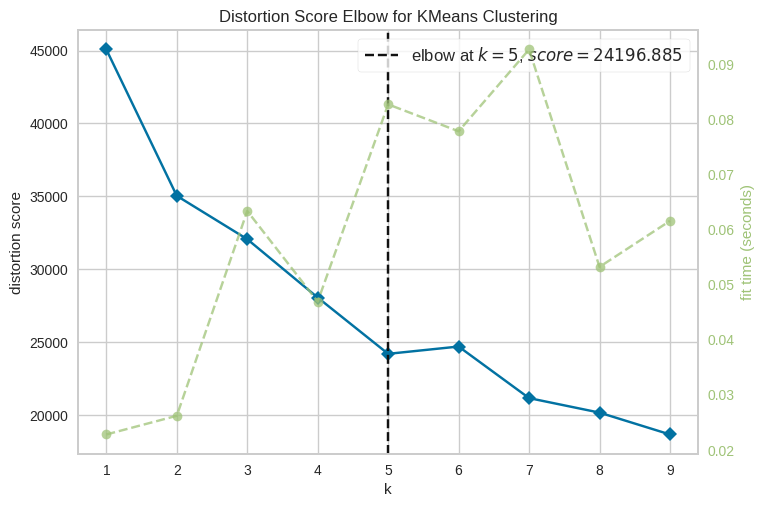

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans = KMeans()

# Inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)
labels = kmeans.predict(testData1)

In [ ]:
score1 = silhouette_score(testData1, labels)
score1

-0.15446201969190315

## **c. Feature Selection (Opsional)**

In [ ]:
X2 = df.iloc[:, [2, 3,5,8] + list(range(48,51))].values
X2 = pd.DataFrame(X2, columns=['Age','kmDriven','Owner','AskPrice'] + encodedDfFuelT.columns.tolist())
X2

,Age,kmDriven,Owner,AskPrice,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol
0,23.0,98000.0,1.0,195000.0,0.0,0.0,1.0
1,15.0,190000.0,1.0,375000.0,1.0,0.0,0.0
2,14.0,77246.0,0.0,184999.0,1.0,0.0,0.0
3,7.0,83500.0,1.0,565000.0,1.0,0.0,0.0
4,5.0,45000.0,0.0,685000.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
8188,7.0,98656.0,1.0,355000.0,1.0,0.0,0.0
8189,1.0,15000.0,0.0,1750000.0,0.0,1.0,0.0
8190,0.0,6912.0,0.0,8000000.0,1.0,0.0,0.0
8191,8.0,62125.0,1.0,320000.0,0.0,0.0,1.0


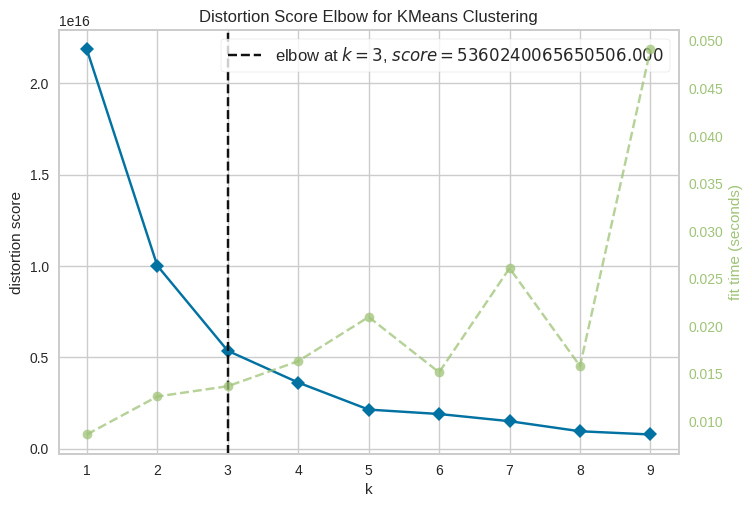

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
kmeans2 = KMeans()

visualizer = KElbowVisualizer(kmeans2, k=(1, 10))

visualizer.fit(X2)

visualizer.show()

In [ ]:
testData2 = df.iloc[:, [2, 3,5,8] + list(range(48,51))].values
testData2 = pd.DataFrame(testData2, columns=['Age','kmDriven','Owner','AskPrice'] + encodedDfFuelT.columns.tolist())
testData2

,Age,kmDriven,Owner,AskPrice,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol
0,23.0,98000.0,1.0,195000.0,0.0,0.0,1.0
1,15.0,190000.0,1.0,375000.0,1.0,0.0,0.0
2,14.0,77246.0,0.0,184999.0,1.0,0.0,0.0
3,7.0,83500.0,1.0,565000.0,1.0,0.0,0.0
4,5.0,45000.0,0.0,685000.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...
8188,7.0,98656.0,1.0,355000.0,1.0,0.0,0.0
8189,1.0,15000.0,0.0,1750000.0,0.0,1.0,0.0
8190,0.0,6912.0,0.0,8000000.0,1.0,0.0,0.0
8191,8.0,62125.0,1.0,320000.0,0.0,0.0,1.0


In [ ]:
kmeans2 = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X2)
labels2 = kmeans2.predict(testData2)

In [ ]:
kmeans2.cluster_centers_

array([[7.90212311e+00, 7.32500128e+04, 4.96060889e-01, 6.85543126e+05,
        3.97382828e-01, 2.02964348e-01, 3.99652824e-01],
       [3.01724138e+00, 3.13543103e+04, 2.58620690e-01, 1.41870690e+07,
        3.27586207e-01, 1.55172414e-01, 5.17241379e-01],
       [4.85913313e+00, 5.12601006e+04, 3.34365325e-01, 3.96536443e+06,
        4.38080495e-01, 1.82662539e-01, 3.79256966e-01]])

In [ ]:
score2 = silhouette_score(X2, labels2)
score2

0.7920053681700661

In [ ]:
#perbandingan model
print(f"Model 1\nsilhouette score1: {score1}\n")
print(f"Model 2\nsilhouette score2: {score2}")
#karena score2 > score1 maka model dengan feature feature yang sudah diekstrak akan digunakan

Model 1
silhouette score1: -0.15446201969190315

Model 2
silhouette score2: 0.7920053681700661


In [ ]:
#menyimpan label hasil clutser ke dataset
X2['Cluster'] = kmeans2.labels_

In [ ]:
#mengurutkan label sehingga mudah untuk diinterpretasi
mapping = {1:2,2:1,0:0}
X2['Cluster'] = [mapping[label] for label in X2['Cluster']]
df['Cluster'] = [mapping[label] for label in X2['Cluster']]

In [ ]:
X2

,Age,kmDriven,Owner,AskPrice,FuelType_Diesel,FuelType_Hybrid/CNG,FuelType_Petrol,Cluster
0,23.0,98000.0,1.0,195000.0,0.0,0.0,1.0,0
1,15.0,190000.0,1.0,375000.0,1.0,0.0,0.0,0
2,14.0,77246.0,0.0,184999.0,1.0,0.0,0.0,0
3,7.0,83500.0,1.0,565000.0,1.0,0.0,0.0,0
4,5.0,45000.0,0.0,685000.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...
8188,7.0,98656.0,1.0,355000.0,1.0,0.0,0.0,0
8189,1.0,15000.0,0.0,1750000.0,0.0,1.0,0.0,0
8190,0.0,6912.0,0.0,8000000.0,1.0,0.0,0.0,1
8191,8.0,62125.0,1.0,320000.0,0.0,0.0,1.0,0


## **d. Visualisasi Hasil Clustering**

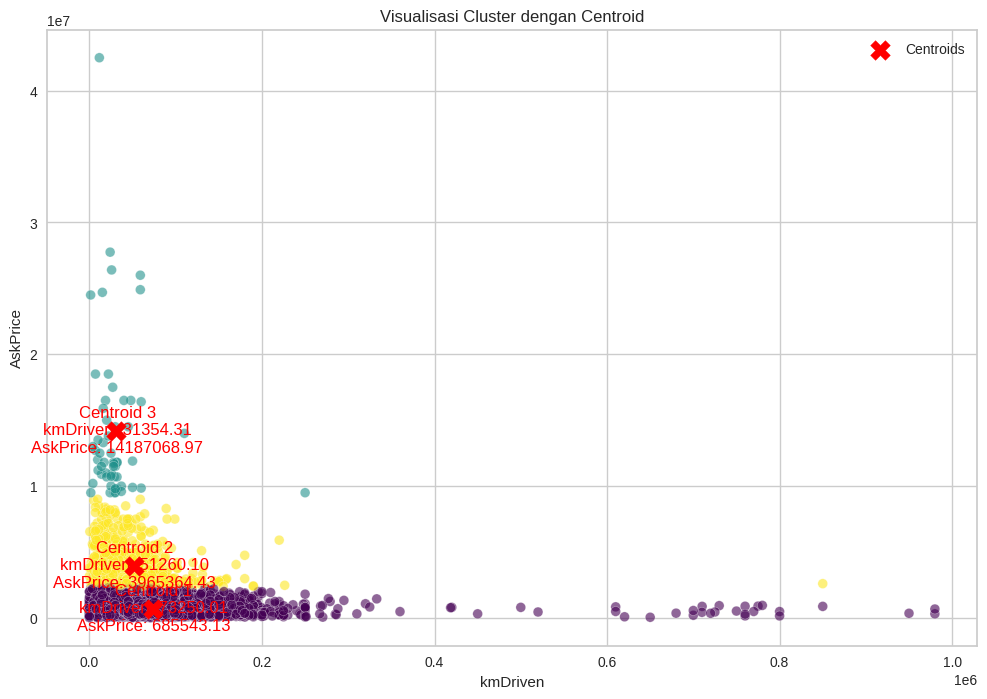

In [ ]:
centroids = kmeans2.cluster_centers_

plt.figure(figsize=(12, 8))

plt.scatter(X2['kmDriven'], X2['AskPrice'], c=labels2, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')

plt.scatter(centroids[:, 1], centroids[:, 3], c='red', s=200, marker='X', label='Centroids')


x_range = X2['kmDriven'].max() - X2['kmDriven'].min()
y_range = X2['AskPrice'].max() - X2['AskPrice'].min()

x_scale = 0.001 * x_range
y_scale = 0.001 * y_range


for i, centroid in enumerate(centroids):
    centroid_data = X2[labels2 == i]
    text = f'Centroid {centroid_data["Cluster"].values[0] + 1}\nkmDriven: {centroids[i, 1]:.2f}\nAskPrice: {centroids[i, 3]:.2f}'
    plt.text(centroid[1] + x_scale, centroid[3] + y_scale, text, color='red', fontsize=12, ha='center', va='center')

plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('kmDriven')
plt.ylabel('AskPrice')
plt.legend()

plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

In [ ]:
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    owner_mapping = {0: "First", 1: "Second"}
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        cluster_data = X[labels == cluster_id]

        mean_Age = cluster_data.iloc[:, 0].mean()
        mean_kmDriven = cluster_data.iloc[:, 1].mean()
        mean_AskPrice = cluster_data.iloc[:, 3].mean()

        mode_Owner = cluster_data.iloc[:, 2].mode()[0]
        mode_FuelType = cluster_data.iloc[:, 4:7].idxmax(axis=1).mode()[0]

        print(f"\nCluster {cluster_data['Cluster'].values[0] + 1}:")
        print(f"Rata-rata Age: {mean_Age:.2f}")
        print(f"Rata-rata kmDriven: {mean_kmDriven:.2f}")
        print(f"Rata-rata AskPrice: {mean_AskPrice:.2f}")
        print(f"Mode Owner: {owner_mapping[mode_Owner]}")
        print(f"Mode Fuel Type: {mode_FuelType}")

# Analisis karakteristik setiap cluster
analyze_clusters(X2, labels2, 3)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Age: 7.90
Rata-rata kmDriven: 73250.01
Rata-rata AskPrice: 685543.13
Mode Owner: First
Mode Fuel Type: FuelType_Petrol

Cluster 3:
Rata-rata Age: 3.02
Rata-rata kmDriven: 31354.31
Rata-rata AskPrice: 14187068.97
Mode Owner: First
Mode Fuel Type: FuelType_Petrol

Cluster 2:
Rata-rata Age: 4.86
Rata-rata kmDriven: 51260.10
Rata-rata AskPrice: 3965364.43
Mode Owner: First
Mode Fuel Type: FuelType_Diesel


Tulis hasil interpretasinya di sini.
1. **Cluster 1:**
    *   **Rata-rata Age:** 7.90
    *   **Rata-rata kmDriven:** 73250.01
    *   **Rata-rata AskPrice:** 685543.13
    *   **Owner:** First Owner
    *  **FuelType:** Petrol
    *   **Analisis:** Cluster ini menunjukkan mobil yang berusia lebih tua dibandingkan cluster yang lain dengan jarak tempuh tinggi yang mencerminkan mobil yang sudah banyak digunakan,harga rata-rata jauh lebih rendah dibandingkan cluster lainnya sejalan dengan usia yang tua dan jarak tempuh tinggi.Mayoritas mobil dimiliki oleh pemilik pertama, yang mungkin menjadi daya tarik bagi pembeli meskipun usianya tua.Sebagian besar mobil menggunakan bensin, yang umum untuk mobil tua dengan harga lebih terjangkau.

2. **Cluster 2:**
    *  **Rata-rata Age:** 4.86
    * **Rata-rata kmDriven:** 51260.10
    * **Rata-rata AskPrice:** 3965364.43
    * **Owner:** First Owner
    * **FuelType:** Petrol
    *   **Analisis:** Cluster ini mencerminkan mobil dengan usia menengah dan jarak tempuh yang sedang dan menunjukkan kondisi yang masih layak pakai.Mobil-mobil ini berada di tengah-tengah antara mobil baru dan mobil tua, baik dalam hal usia, jarak tempuh, maupun harga.Harga yang  menengah ini mengindikasikan bahwa mobil-mobil dalam cluster ini menawarkan keseimbangan antara kualitas dan keterjangkauan.Sebagian besar mobil menggunakan bahan bakar diesel, yang sering dipilih untuk efisiensi bahan bakar dan daya tahan dalam perjalanan jauh.

3. **Cluster 3:**
    * **Rata-rata Age:** 3.02
    * **Rata-rata kmDriven:** 31354.31
    * **Rata-rata AskPrice**: 14187068.97
    * **Owner:** First Owner
    * **FuelType:** Diesel
    *   **Analisis:** Cluster ini menandakan mobil yang umurnya lebih baru dengan jarak tempuh rendah yang kemungkinan berada dalam kondisi sangat baik.Harga yang tinggi mencerminkan nilai pasar yang masih tinggi karena kondisi dan usia kendaraan.


**Interpretasi**
hasil clustering ini sesuai dengan ekspektasi dan logika bisnis dimana ada pola yang saling berhubungan seperti berikut
  * Cluster 1:
Mobil tua, jarak tempuh tinggi, harga murah. Ideal untuk pembeli dengan anggaran terbatas.

* Cluster 2:
Mobil menengah dari segi usia, jarak tempuh, dan harga. Pilihan seimbang untuk pembeli yang mengutamakan efisiensi bahan bakar dan kualitas.

* Cluster 3:
Mobil baru, jarak tempuh rendah, harga tinggi. Menargetkan pembeli kelas atas yang mencari mobil bekas dalam kondisi baik.

Model ini dapat menentukan kondisi sebuah mobil apakah sebuah mobil dalam kondisi baik,menengah,dan buruk.Ini akan bermanfaat pada suatu bisnis yang bergerak dalam bidang jual beli mobil bekas ataupun customer yang ingin membeli mobil bekas

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [ ]:
file_path = os.getcwd() +'/hasil_clustering.csv'
X2.to_csv(file_path)
file_path

'/content/hasil_clustering.csv'